In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model

In [2]:
sp_data = pd.read_csv('./SP500.csv', index_col='Date', parse_dates=True)

In [3]:
# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'].dropna(), p = 1, q = 1, 
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit()

# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14832.611200289291
Iteration:      2,   Func. Count:     16,   Neg. LLF: 22318901155.18984
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4226.89994318323
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2782.9233125218548
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2775.3216574742
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2771.988661563638
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2771.9642779830683
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2771.963838327781
Iteration:     11,   Func. Count:     69,   Neg. LLF: 2771.963828246164
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
 

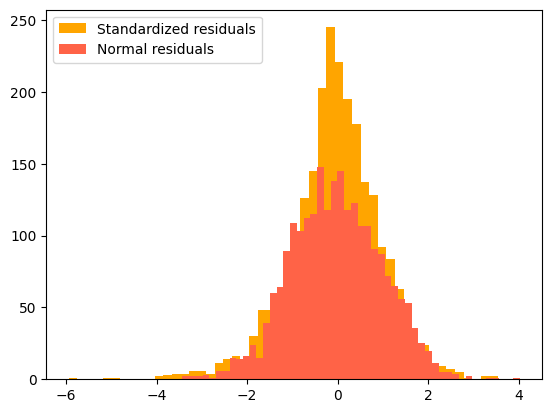

In [5]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid / gm_std
# Get the normal (Gaussian) residuals
normal_resid = np.random.normal(0, 1, size=len(gm_resid))
# Plot the histogram of the standardized residuals
plt.hist(gm_std_resid, bins=50, facecolor='orange', label='Standardized residuals')
plt.hist(normal_resid, bins=50, facecolor='tomato', label='Normal residuals')
plt.legend(loc='upper left')
plt.show()

In [6]:
# Specify GARCH model assumptions
skewt_gm = arch_model(sp_data['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
# Fit the model
skewt_result = skewt_gm.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 77926.86112265919
Iteration:      2,   Func. Count:     19,   Neg. LLF: 147440.0251835162
Iteration:      3,   Func. Count:     28,   Neg. LLF: 53482.232549969376
Iteration:      4,   Func. Count:     36,   Neg. LLF: 5832.5998015417335
Iteration:      5,   Func. Count:     46,   Neg. LLF: 93659.75814882081
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5423.856962822037
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4658.65008552914
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2690.3468398195937
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2691.2805584555344
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2690.4857728893876
Iteration:     11,   Func. Count:     94,   Neg. LLF: 2689.990911767527
Iteration:     12,   Func. Count:    101,   Neg. LLF: 2689.9812755508756
Iteration:     13,   Func. Count:    108,   Neg. LLF: 2689.979806553789
Iteration:     14,   Func. Count:    115,   Neg. LLF: 2689.

In [8]:
# Specify GARCH model assumptions
normal_gm = arch_model(sp_data['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
normal_result = normal_gm.fit()

# Get model estimated volatility
normal_vol = normal_result.conditional_volatility

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14832.611200289291
Iteration:      2,   Func. Count:     16,   Neg. LLF: 22318901155.18984
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4226.89994318323
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2782.9233125218548
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2775.3216574742
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2771.988661563638
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2771.9642779830683
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2771.963838327781
Iteration:     11,   Func. Count:     69,   Neg. LLF: 2771.963828246164
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
 

Iteration:      1,   Func. Count:      8,   Neg. LLF: 77926.86112265919
Iteration:      2,   Func. Count:     19,   Neg. LLF: 147440.0251835162
Iteration:      3,   Func. Count:     28,   Neg. LLF: 53482.232549969376
Iteration:      4,   Func. Count:     36,   Neg. LLF: 5832.5998015417335
Iteration:      5,   Func. Count:     46,   Neg. LLF: 93659.75814882081
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5423.856962822037
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4658.65008552914
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2690.3468398195937
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2691.2805584555344
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2690.4857728893876
Iteration:     11,   Func. Count:     94,   Neg. LLF: 2689.990911767527
Iteration:     12,   Func. Count:    101,   Neg. LLF: 2689.9812755508756
Iteration:     13,   Func. Count:    108,   Neg. LLF: 2689.979806553789
Iteration:     14,   Func. Count:    115,   Neg. LLF: 2689.

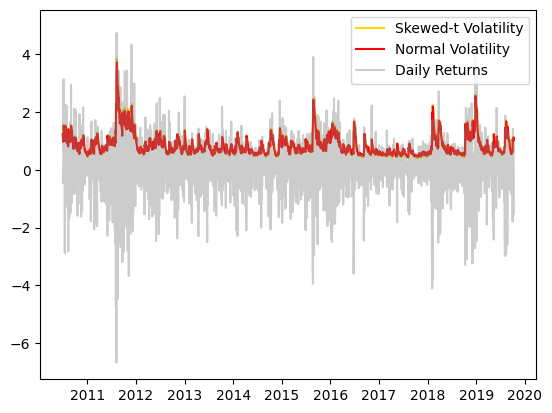

In [9]:
# Specify GARCH model assumptions
skewt_gm = arch_model(sp_data['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
# Fit the model
skewt_result = skewt_gm.fit()

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

# Plot model fitting results
plt.plot(skewt_vol, color = 'gold', label = 'Skewed-t Volatility')
plt.plot(normal_vol, color = 'red', label = 'Normal Volatility')
plt.plot(sp_data['Return'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

In [17]:
armean_result = arch_model(sp_data['Return'], p = 1, q = 1, mean = 'AR', vol = 'GARCH', lags=1, dist = 'normal').fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 14975.669459231587
Iteration:      2,   Func. Count:     18,   Neg. LLF: 107230332418.31674
Iteration:      3,   Func. Count:     27,   Neg. LLF: 69511201894.41888
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4260.955462347289
Iteration:      5,   Func. Count:     44,   Neg. LLF: 3747.791061571388
Iteration:      6,   Func. Count:     51,   Neg. LLF: 2779.0468749986
Iteration:      7,   Func. Count:     58,   Neg. LLF: 2778.1499837076094
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2767.575784674747
Iteration:      9,   Func. Count:     71,   Neg. LLF: 2767.5436868632014
Iteration:     10,   Func. Count:     77,   Neg. LLF: 2767.5425369131754
Iteration:     11,   Func. Count:     83,   Neg. LLF: 2767.542155146676
Iteration:     12,   Func. Count:     89,   Neg. LLF: 2767.5421421304263
Iteration:     13,   Func. Count:     94,   Neg. LLF: 2767.5421421310084
Optimization terminated successfully    (Exit mode 0)
     

In [19]:
cmean_result = arch_model(sp_data['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH').fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14832.611200289291
Iteration:      2,   Func. Count:     16,   Neg. LLF: 22318901155.18984
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4226.89994318323
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2782.9233125218548
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2775.3216574742
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2771.988661563638
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2771.9642779830683
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2771.963838327781
Iteration:     11,   Func. Count:     69,   Neg. LLF: 2771.963828246164
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
 

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                           5574.95
                                        No. Observations:                 2336
Date:                Sun, Dec 03 2023   Df Residuals:                     2335
Time:                        08:49:31   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0772  1.445e-02      5.345  9.031e-08 [4.892e-0

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

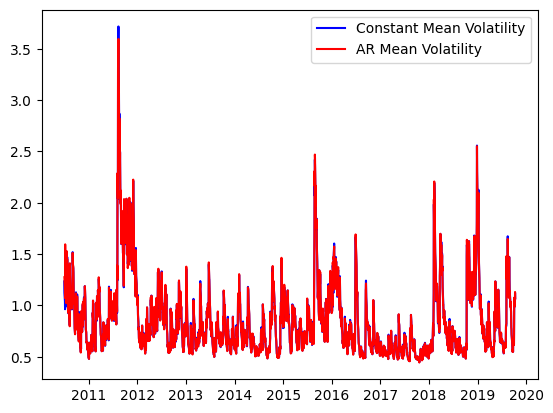

nan


In [21]:
# Print model summary of GARCH with constant mean
print(cmean_result.summary())
# Print model summary of GARCH with AR mean
print(armean_result.summary())
cmean_vol = cmean_result.conditional_volatility
armean_vol = armean_result.conditional_volatility
# Plot model volatility 
plt.plot(cmean_vol, color = 'blue', label = 'Constant Mean Volatility')
plt.plot(armean_vol, color = 'red', label = 'AR Mean Volatility')
plt.legend(loc = 'upper right')
plt.show()

# Check correlation of volatility estimations
print(np.corrcoef(cmean_vol, armean_vol)[0,1])

In [14]:
bitcoin_data = pd.read_csv('./bitcoin.csv', index_col='Date', parse_dates=True) 

In [15]:
# Specify model assumptions
gjr_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'GARCH', dist = 't')

# Fit the model
gjrgm_result = gjr_gm.fit(disp = 'off')

# Print model fitting summary
print(gjrgm_result.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -3966.26
Distribution:      Standardized Student's t   AIC:                           7944.52
Method:                  Maximum Likelihood   BIC:                           7976.33
                                              No. Observations:                 1483
Date:                      Sun, Dec 03 2023   Df Residuals:                     1482
Time:                              08:45:03   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

In [22]:
# Specify model assumptions
egarch_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')

# Fit the model
egarch_result = egarch_gm.fit(disp = 'off')

# Print model fitting summary
print(egarch_result.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -3954.19
Distribution:      Standardized Student's t   AIC:                           7920.38
Method:                  Maximum Likelihood   BIC:                           7952.19
                                              No. Observations:                 1483
Date:                      Sun, Dec 03 2023   Df Residuals:                     1482
Time:                              08:51:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1890: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1891: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert isinstance(table_val[pos], float)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1892: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

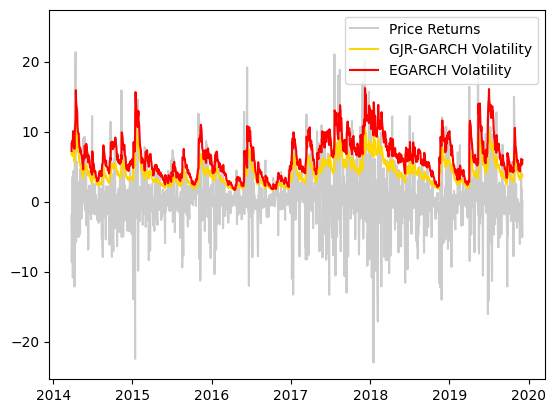

In [24]:
# Plot the actual Bitcoin returns
plt.plot(bitcoin_data['Return'], color = 'grey', alpha = 0.4, label = 'Price Returns')
gjrgm_vol = gjrgm_result.conditional_volatility
egarch_vol = egarch_result.conditional_volatility
# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'gold', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = 'red', label = 'EGARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

In [49]:
start_loc = 2081
end_loc = 2201
# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'].dropna(), p = 1, q = 1, 
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
# gm_result = basic_gm.fit()
for i in range(30):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs = i + start_loc, 
                             last_obs = i + end_loc, update_freq = 5)

Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.34185478042446
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.32472015398912
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.15480829056105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.13103443333628
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 186.10811377547958
Optimization terminated successfully    (Exit mode 0)
            Current function value: 186.10299133930806
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     35,   Neg. LLF: 279.4517385207863
Iteration:     10,   Func. Count:     62,   Neg. LLF: 184.99111532555008
Optimization

In [50]:
forecasts = {}
for i in range(30):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs = i + start_loc, 
                             last_obs = i + end_loc, update_freq = 5)
    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i ]
    forecasts[fcast.name] = fcast
    print('Iteration: %d, forecast: %f' % (i + 1, fcast))
# Save all forecast to a DataFrame    
forecast_var = pd.DataFrame(forecasts).T

Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.34185478042446
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.32472015398912
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration: 1, forecast: 0.641792
Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.15480829056105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.13103443333628
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration: 2, forecast: 0.644272
Iteration:      5,   Func. Count:     34,   Neg. LLF: 186.10811377547958
Optimization terminated successfully    (Exit mode 0)
            Current function value: 186.10299133930806
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration: 3, forecast: 0.506540
Iteration:      5,   Func. Count:     35,   Neg. LLF: 279.

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_29676\3249629946.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Iteration: %d, forecast: %f' % (i + 1, fcast))
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_29676\3249629946.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Iteration: %d, forecast: %f' % (i + 1, fcast))
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_29676\3249629946.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Iteration: %d, forecast: %f' % (i + 1, fcast))
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_29676\3249629946.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use

Iteration:      5,   Func. Count:     33,   Neg. LLF: 708.4032661020469
Optimization terminated successfully    (Exit mode 0)
            Current function value: 164.14518759056875
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration: 18, forecast: 1.004350
Iteration:      5,   Func. Count:     33,   Neg. LLF: 164.2532190522407
Optimization terminated successfully    (Exit mode 0)
            Current function value: 162.6549136287381
            Iterations: 8
            Function evaluations: 50
            Gradient evaluations: 8
Iteration: 19, forecast: 0.863730
Iteration:      5,   Func. Count:     33,   Neg. LLF: 162.91051841405664
Optimization terminated successfully    (Exit mode 0)
            Current function value: 161.5984772279067
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
Iteration: 20, forecast: 0.945702
Iteration:      5,   Func. Count:     34,   Neg. LLF: 160.8

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_29676\3249629946.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Iteration: %d, forecast: %f' % (i + 1, fcast))
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_29676\3249629946.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Iteration: %d, forecast: %f' % (i + 1, fcast))
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_29676\3249629946.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Iteration: %d, forecast: %f' % (i + 1, fcast))
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_29676\3249629946.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use

Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.34185478042446
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.32472015398912
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.15480829056105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.13103443333628
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 186.10811377547958
Optimization terminated successfully    (Exit mode 0)
            Current function value: 186.10299133930806
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     35,   Neg. LLF: 279.4517385207863
Iteration:     10,   Func. Count:     62,   Neg. LLF: 184.99111532555008
Optimization

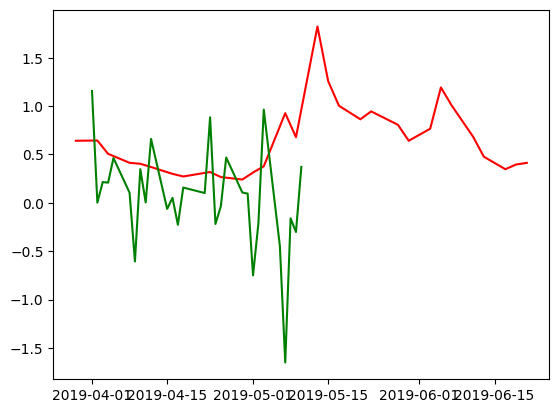

In [51]:
for i in range(30):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs = i + start_loc, 
                             last_obs = i + end_loc, update_freq = 5)
    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i ]
    forecasts[fcast.name] = fcast
# Save all forecast to a DataFrame       
forecast_var = pd.DataFrame(forecasts).T

# Plot the forecast variance
plt.plot(forecast_var, color = 'red')
plt.plot(sp_data.Return['2019-4-1':'2019-5-10'], color = 'green')
plt.show()

In [52]:
variance_expandwin = gm_result.conditional_volatility

Date
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
2010-07-07   NaN
2010-07-08   NaN
Name: cond_vol, dtype: float64
Date
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
2010-07-07   NaN
2010-07-08   NaN
Name: cond_vol, dtype: float64


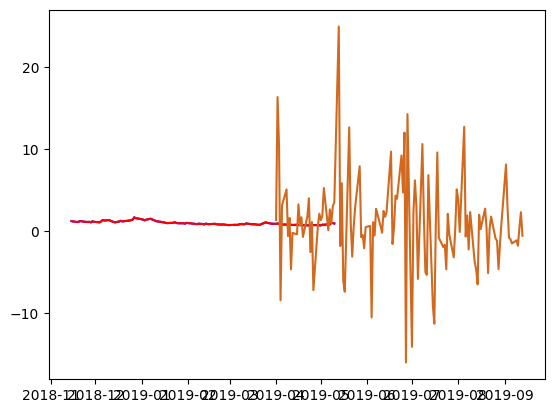

In [53]:
variance_expandwin = gm_result.conditional_volatility
variance_fixedwin = gm_result.conditional_volatility

# Print header of variance forecasts with expanding and fixed window
print(variance_expandwin.head())
print(variance_fixedwin.head())

# Calculate volatility from variance forecast with an expanding window
vol_expandwin = np.sqrt(variance_expandwin)
# Calculate volatility from variance forecast with a fixed rolling window
vol_fixedwin = np.sqrt(variance_fixedwin)

# Plot volatility forecast with an expanding window
plt.plot(vol_expandwin, color = 'blue')
# Plot volatility forecast with a fixed rolling window
plt.plot(vol_fixedwin, color = 'red')
plt.plot(bitcoin_data.Return['2019-4-1':'2019-9-15'], color = 'chocolate')
plt.show()